In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
def lorentz(x,y0,xc,q,A,noise):
    y = y0/2-(2*A/np.pi)*(xc*q/(4*q**2*(x-xc)**2+xc**2))
    y = y + np.random.normal(y, noise)
    return y

def fano(x,y0,xc,A,u,q,noise):
    y = y0/2+A*((u+(2*q/xc)*(xc-x))**2/(1+((2*q/xc)*(xc-x))**2))
    y = y + np.random.normal(y, noise)
    return y 

(2000,)


' kind = np.array([1,0])\nfano_test = np.append(fano_test, kind)\nprint(fano_test.shape)  '

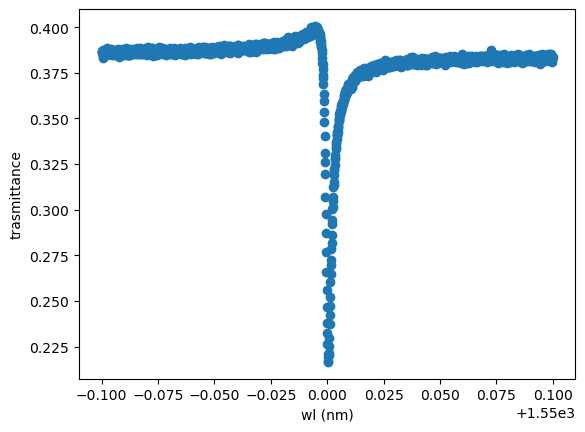

In [153]:
wl=np.arange(1549.9,1550.1,0.0001)
fano_test = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=np.random.uniform(0.05, 0.3), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.001)
lorentz_test = lorentz(x=wl, y0=np.random.uniform(0.4, 0.48), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.001,0.0015), noise=0.001)

#np.random.uniform(0.05, 0.3)

plt.scatter(wl, fano_test)
#plt.scatter(wl, lorentz_test)
plt.xlabel('wl (nm)')
plt.ylabel('trasmittance')

print(wl.shape)
""" kind = np.array([1,0])
fano_test = np.append(fano_test, kind)
print(fano_test.shape)  """

In [164]:
for i in range(5):
    print(i)

0
1
2
3
4


In [168]:
wl=np.arange(1549.9,1550.1,0.0001)
data_test = np.zeros((2000,2001))
lorentz_def = 1
fano_def = 0

for i in range(1000):
    lorentz_sim = lorentz(x=wl, y0=np.random.uniform(0.4, 0.48), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.001,0.0015), noise=0.001)
    lorentz_sim = np.append(lorentz_sim, lorentz_def)
    data_test[i,:] = lorentz_sim

for i in range(1000):
    fano_sim = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=np.random.uniform(0.05, 0.3), xc=1550, q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.001)
    fano_sim = np.append(fano_sim, fano_def)
    data_test[i+1000,:] = fano_sim 

print(data_test[2000])

IndexError: index 2000 is out of bounds for axis 0 with size 2000